# python libraries

In [1]:
import gluoncv as gcv
import mxnet as mx
# mxnet NDarray 
from mxnet import nd

# MXNet Gluon Neural network layers.
from mxnet.gluon import nn

# optional for displaying the image
import matplotlib.pyplot as plt
import numpy as np
import os
import math
# pip install pillow but import PIL
#from PIL import Image

# file system setup

In [2]:
# setup file system locations
# yes, this should use os file path TODO: fix it
TOP_DIR='../'
print('TOP_DIR = ', TOP_DIR)
ICY_BRIDGE_DIR = TOP_DIR + 'icy-bridge/'
print('TOP_DIR = ', ICY_BRIDGE_DIR)
MODEL_NAME = 'c6'
MODEL_TOP_DIR = ICY_BRIDGE_DIR + MODEL_NAME + '/'
print('MODEL_TOP_DIR = ', MODEL_TOP_DIR)
MODEL_RAW_IMAGE_DIR = MODEL_TOP_DIR + 'raw/'
MODEL_POST_IMAGE_DIR = MODEL_TOP_DIR + 'post_rotate_crop/'
print('MODEL_RAW_IMAGE_DIR = ', MODEL_RAW_IMAGE_DIR)
print('MODEL_POST_IMAGE_DIR = ', MODEL_POST_IMAGE_DIR)

TOP_DIR =  ../
TOP_DIR =  ../icy-bridge/
MODEL_TOP_DIR =  ../icy-bridge/c6/
MODEL_RAW_IMAGE_DIR =  ../icy-bridge/c6/raw/
MODEL_POST_IMAGE_DIR =  ../icy-bridge/c6/post_rotate_crop/


# Notes about the images

Results via file command.

## Grid

A png grayscale

## Stimpy

A png grayscale

## Long Neck Deer

A color jpg

## Mount Baker

Another color jpg

## Sample Camera

A sample camera image


# Loading images via Apache MXNet

In [3]:
def image_file_info(a_file_name):
    print('-- RFN: ', a_file_name)
    print(os.system('file ' + a_file_name))
    print('^^^^^^^')

# imshow docs
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
def show_it_mxnet(a_nd_array, cmap='viridis'):
    plt.imshow(a_nd_array.asnumpy(), cmap=cmap)
    print("type: ", type(a_nd_array))
    print("shape: ", a_nd_array.shape)


-- RFN:  imgs/stimpyG.png
imgs/stimpyG.png: PNG image data, 3024 x 4032, 8-bit grayscale, non-interlaced
0
^^^^^^^
type:  <class 'mxnet.ndarray.ndarray.NDArray'>
shape:  (4032, 3024, 1)


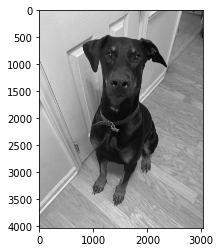

In [4]:
# Setup the sample image file paths
a_file_name = 'imgs/stimpyG.png'
image_file_info(a_file_name)

# flag=1 is for color. flag = 0 for grayscale
#
# notes on imread
#
# https://mxnet.apache.org/versions/1.6/api/python/docs/api/mxnet/image/index.html#mxnet.image.imread
#
img_nd_array = mx.image.imread(a_file_name, flag=0)
show_it_mxnet(img_nd_array, cmap='gray')

-- RFN:  imgs/testy-grid.png
imgs/testy-grid.png: PNG image data, 640 x 480, 8-bit/color RGB, non-interlaced
0
^^^^^^^
type:  <class 'mxnet.ndarray.ndarray.NDArray'>
shape:  (480, 640, 1)


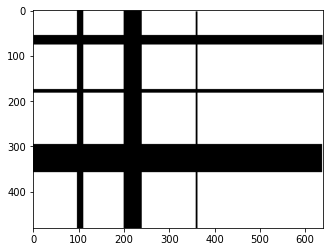

In [5]:
# Setup the sample image file paths
a_file_name = 'imgs/testy-grid.png'
image_file_info(a_file_name)

# flag=1 is for color. flag = 0 for grayscale
img_nd_array = mx.image.imread(a_file_name, flag=0)
show_it_mxnet(img_nd_array, cmap='gray')

-- RFN:  0.jpg
0.jpg: JPEG image data, JFIF standard 1.01, resolution (DPI), density 72x72, segment length 16, baseline, precision 8, 640x427, components 3
0
^^^^^^^
type:  <class 'mxnet.ndarray.ndarray.NDArray'>
shape:  (427, 640, 3)


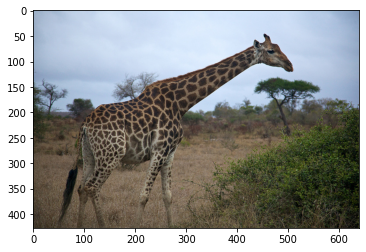

In [6]:
# Setup the sample image file paths
a_file_name = '0.jpg'
image_file_info(a_file_name)

# flag=1 is for color. flag = 0 for grayscale
img_nd_array = mx.image.imread(a_file_name, flag=1)
show_it_mxnet(img_nd_array)

-- RFN:  imgs/mt_baker.jpg
imgs/mt_baker.jpg: JPEG image data, JFIF standard 1.01, aspect ratio, density 144x144, segment length 16, Exif Standard: [TIFF image data, big-endian, direntries=4, xresolution=62, yresolution=70, resolutionunit=2], baseline, precision 8, 3000x1458, components 3
0
^^^^^^^
type:  <class 'mxnet.ndarray.ndarray.NDArray'>
shape:  (1458, 3000, 3)


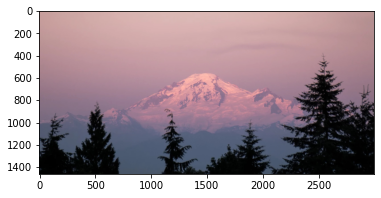

In [7]:
# Setup the sample image file paths
a_file_name = 'imgs/mt_baker.jpg'
image_file_info(a_file_name)

# flag=1 is for color. flag = 0 for grayscale
img_nd_array = mx.image.imread(a_file_name, flag=1)
show_it_mxnet(img_nd_array)

-- RFN:  ../icy-bridge/c6/raw/BUS40_SALEM_20220114Z1255.jpg
../icy-bridge/c6/raw/BUS40_SALEM_20220114Z1255.jpg: JPEG image data, JFIF standard 1.01, resolution (DPI), density 96x96, segment length 16, Exif Standard: [TIFF image data, big-endian, direntries=1], baseline, precision 8, 704x480, components 3
0
^^^^^^^
type:  <class 'mxnet.ndarray.ndarray.NDArray'>
shape:  (480, 704, 3)


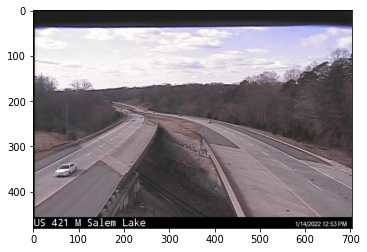

In [8]:
# Setup the sample image file paths
a_file_name = MODEL_RAW_IMAGE_DIR + 'BUS40_SALEM_20220114Z1255.jpg'
image_file_info(a_file_name)

# flag=1 is for color. flag = 0 for grayscale
img_nd_array = mx.image.imread(a_file_name, flag=1)
show_it_mxnet(img_nd_array)

# some urls
https://mxnet.apache.org/versions/1.6/api/python/docs/api/mxnet/image/index.html#mxnet.image.RandomGrayAug

https://mxnet.apache.org/versions/1.6/api/python/docs/api/mxnet/image/index.html

https://mxnet.apache.org/versions/1.2.1/tutorials/python/types_of_data_augmentation.html

https://mxnet.apache.org/versions/1.5.0/tutorials/basic/reshape_transpose.html


# manipulating the testy image

type:  <class 'mxnet.ndarray.ndarray.NDArray'>
shape:  (480, 640, 1)
type:  <class 'numpy.ndarray'>
shape:  (480, 640, 1)


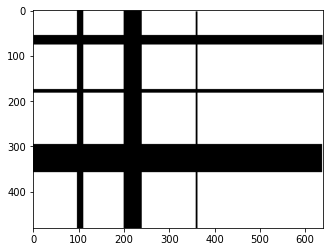

In [14]:
# Setup the sample image file paths
a_file_name = 'imgs/testy-grid.png'
# flag=1 is for color. flag = 0 for grayscale
img_nd_array = mx.image.imread(a_file_name, flag=0)
img_np_array = img_nd_array.asnumpy()
print("type: ", type(img_nd_array))
print("shape: ", img_nd_array.shape)
print("type: ", type(img_np_array))
print("shape: ", img_np_array.shape)
plt.imshow(img_np_array, cmap='gray')

Notice, the size of the np and nd arrays are the same.  What is the last value which is just one additional dimension?

In [15]:
img_np_array[0,0,0]

255

In [16]:
img_np_array[310,210,0]

3

In [17]:
img_nd_array[0,0,0]


[255]
<NDArray 1 @cpu(0)>

In [18]:
img_nd_array[310,210,0]


[3]
<NDArray 1 @cpu(0)>

A couple of things to note here:

* the first parameter, is the row or vertical axis, or the y axis. 
* the second parameter, is the column or horizontal axis, or the x axis.
* 0,0 is the upper left and it increases as it goes down or to right.
* Note, the values resolve to a scalar for the value in np arrays, but in mxnet all scalars resolve to an array of just one element.

type:  <class 'mxnet.ndarray.ndarray.NDArray'>
shape:  (427, 640, 3)
type:  <class 'numpy.ndarray'>
shape:  (427, 640, 3)


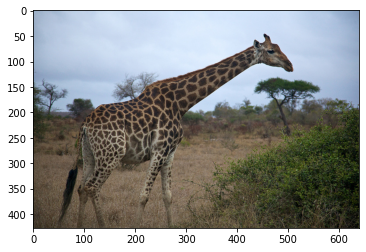

In [19]:
# Setup the sample image file paths
a_file_name = '0.jpg'
# flag=1 is for color. flag = 0 for grayscale
img_nd_array = mx.image.imread(a_file_name, flag=1)
img_np_array = img_nd_array.asnumpy()
print("type: ", type(img_nd_array))
print("shape: ", img_nd_array.shape)
print("type: ", type(img_np_array))
print("shape: ", img_np_array.shape)
plt.imshow(img_np_array, cmap='viridis')

Notice the color jpg image is similar but the last axis has three values.  This is because its Red, Green, Blue

# subsetting the image

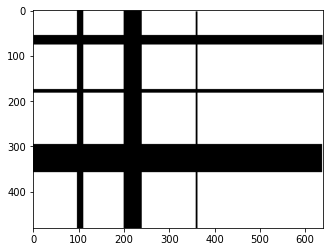

In [20]:
# Setup the sample image file paths
a_file_name = 'imgs/testy-grid.png'
# flag=1 is for color. flag = 0 for grayscale
img_nd_array = mx.image.imread(a_file_name, flag=0)
img_np_array = img_nd_array.asnumpy()
plt.imshow(img_np_array, cmap='gray')

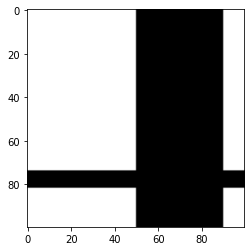

In [21]:
subset_nd_array = img_nd_array[100:200,150:250]
subset_np_array = subset_nd_array.asnumpy()
plt.imshow(subset_np_array, cmap='gray')

# Drawing on the image

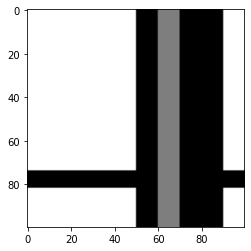

In [22]:
# draw a vertical gray line
subset_nd_array[:,60:70] = 128
subset_np_array = subset_nd_array.asnumpy()
plt.imshow(subset_np_array, cmap='gray')

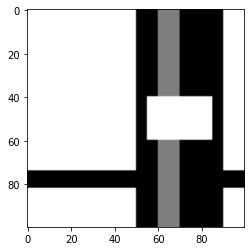

In [23]:
# draw a  white square
subset_nd_array[40:60, 55:85] = 255
subset_np_array = subset_nd_array.asnumpy()
plt.imshow(subset_np_array, cmap='gray')

# Notice the colors

* 255 is white
* 0 is white

# Rotating an image

# Converting an image to grayscale

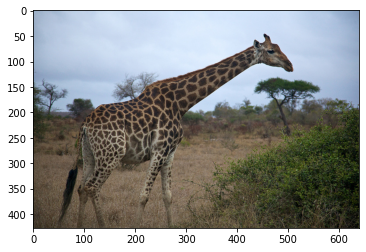

In [24]:
# Setup the sample image file paths
a_file_name = '0.jpg'
# flag=1 is for color. flag = 0 for grayscale
img_nd_array = mx.image.imread(a_file_name, flag=1)
img_np_array = img_nd_array.asnumpy()
plt.imshow(img_np_array, cmap='viridis')

python type of an element is  <class 'mxnet.ndarray.ndarray.NDArray'>
dtype is  <class 'numpy.uint8'>
dtype is  <class 'numpy.float32'>


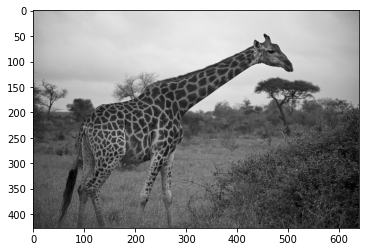

In [49]:
aug = mx.image.RandomGrayAug(p=1)

# What is the current type?

print('python type of an element is ', type(img_nd_array[0,0,0]))
print("dtype is ", img_nd_array.dtype)

nd_array_f32 = img_nd_array.astype("float32")

# the copy is uint8
#print("dtype is ", img_nd_array.dtype)
# the copy is now 
print("dtype is ", nd_array_f32.dtype)

# for grins here is a copy of the image using the copy command. Not sure
# how it differs from the assignment 
#another_copy = nd_array_f32.copy()
#print("dtype is ", another_copy.dtype)


# attempt to rotate now that it is float32

nd_array_f32 = aug(nd_array_f32)
np_array_f32 = nd_array_f32.asnumpy()
#plt.imshow(np_array_f32, cmap='gray')

# This fails because the floats need to be [0..1]
nd_array_f3201 = nd_array_f32/255
np_array_f3201 = nd_array_f3201.asnumpy()
plt.imshow(np_array_f3201, cmap='gray')


# Redo conversion to grayscale with better naming convention and fewer steps

dtype is  <class 'numpy.uint8'>
a value is  
[153]
<NDArray 1 @cpu(0)>
size  (427, 640, 3)
dtype is  <class 'numpy.float32'>
a value is  
[153.]
<NDArray 1 @cpu(0)>


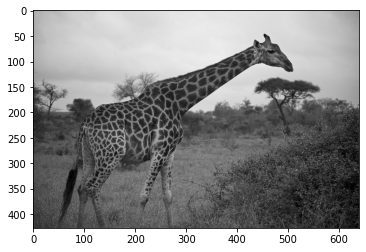

In [78]:
a_file_name = '0.jpg'
# flag=1 is for color. flag = 0 for grayscale
# The result is a Height=427, Width=640, Channel=3, RGB
nd_array_uint8_HWC3 = mx.image.imread(a_file_name, flag=1)
print("dtype is ", nd_array_uint8_HWC3.dtype)
print("a value is ", nd_array_uint8_HWC3[0,0,0])
print("size ", nd_array_uint8_HWC3.shape)
np_array = nd_array_uint8_HWC3.asnumpy()
#plt.imshow(np_array, cmap='viridis')


gray_aug = mx.image.RandomGrayAug(p=1)
# convert to float32 [0..1] for augment operation
nd_array_f32_HWC3 = nd_array_uint8_HWC3.astype("float32")
print("dtype is ", nd_array_f32_HWC3.dtype)
print("a value is ", nd_array_f32_HWC3[0,0,0])
nd_array_f3201_HWC3 = nd_array_f32_HWC3/255
# the actual gray augment operation
nd_array_f3201_HWC3 = aug(nd_array_f3201_HWC3)
gray_np_array_f3201_HWC3 = nd_array_f3201_HWC3.asnumpy()
plt.imshow(gray_np_array_f3201_HWC3, cmap='gray')


# Redo a third time with even less code

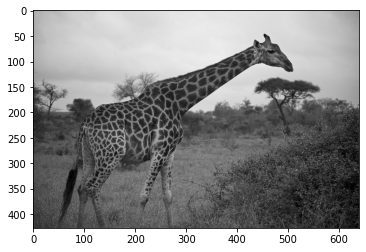

In [83]:
a_file_name = '0.jpg'
# flag=1 is for color. flag = 0 for grayscale
# The result is a Height=427, Width=640, Channel=3, RGB
nd_array_uint8_HWC3 = mx.image.imread(a_file_name, flag=1)
np_array = nd_array_uint8_HWC3.asnumpy()


gray_aug = mx.image.RandomGrayAug(p=1)
# convert to float32 [0..1] for augment operation
nd_array_f32_HWC3 = nd_array_uint8_HWC3.astype("float32")
nd_array_f3201_HWC3 = nd_array_f32_HWC3/255
# the actual gray augment operation
nd_array_f3201_HWC3 = aug(nd_array_f3201_HWC3)
gray_np_array_f3201_HWC3 = nd_array_f3201_HWC3.asnumpy()
#plt.imshow(gray_np_array_f3201_HWC3, cmap='gray')
plt.imshow(gray_np_array_f3201_HWC3, cmap='viridis') # what?

# But what did it the grayscale operaiton actually do?

In [82]:
nd_array_f3201_HWC3.shape

(427, 640, 3)

In [84]:
nd_array_f3201_HWC3[0,0,:]


[0.66882354 0.66882354 0.66882354]
<NDArray 3 @cpu(0)>

# It simply set all three channels to the same value for each pixel
So, simply slice one layer to make a true grayscale image

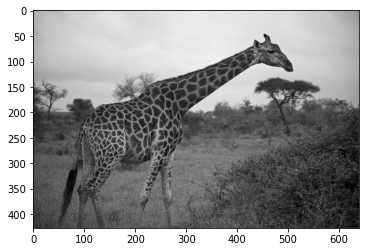

In [92]:
nd_array_f3201_HWC1 = nd_array_f3201_HWC3[:,:,0]
nd_array_f3201_HWC1.shape
gray_np_array_f3201_HWC1 = nd_array_f3201_HWC1.asnumpy()
plt.imshow(gray_np_array_f3201_HWC1, cmap='gray')
#plt.imshow(gray_np_array_f3201_HWC1, cmap='viridis') # good. a single layer is green. 

# So, the last time for doing a grayscale conversion without any prints or comments

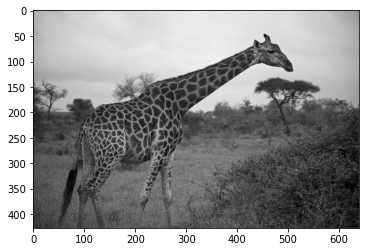

In [93]:
a_file_name = '0.jpg'
nd_array_uint8_HWC3 = mx.image.imread(a_file_name, flag=1)
np_array = nd_array_uint8_HWC3.asnumpy()
gray_aug = mx.image.RandomGrayAug(p=1)
nd_array_f32_HWC3 = nd_array_uint8_HWC3.astype("float32")
nd_array_f3201_HWC3 = nd_array_f32_HWC3/255
nd_array_f3201_HWC3 = aug(nd_array_f3201_HWC3)
gray_np_array_f3201_HWC3 = nd_array_f3201_HWC3.asnumpy()
nd_array_f3201_HWC1 = nd_array_f3201_HWC3[:,:,0]
nd_array_f3201_HWC1.shape
gray_np_array_f3201_HWC1 = nd_array_f3201_HWC1.asnumpy()
plt.imshow(gray_np_array_f3201_HWC1, cmap='gray')